# Predicting Possibility of Heart Disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to predict the possibility of a patient having a heart disease.

Steps in our approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinic parameters about a patient can we predict whether or not that patient has a heart disease?

## 2. Data

The data has been taken from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)

## 3. Evaluation

> If we can reach alteast 95% accuracy in predicting whether a patient has heart disease or not during the proof of concept, we'll pursue the project

## 4. Features

**Create Data Dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the Tools

Pandas, MatPlotLib and NumPy are needed for data analysis and manipulation

In [1]:
# EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Disabling warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

### Data Exploration or Exploratory Data Analysis (EDA)

The goal is to find out more about the data we're working on and become a subject matter expert on the dataset.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different data types?
3. What is missing from the data and how to deal with missing values?
4. What are the outliers?
5. How to add/change/remove features to make data more useful?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find the number of patient with/without heart disease
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

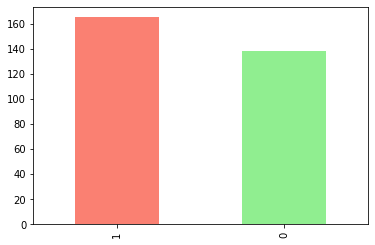

In [7]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [11]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


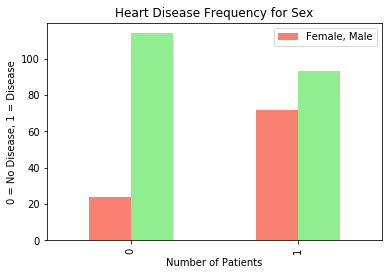

In [13]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color=['salmon', 'lightgreen'])

plt.title('Heart Disease Frequency for Sex')
plt.ylabel('0 = No Disease, 1 = Disease')
plt.xlabel('Number of Patients')
plt.legend(['Female, Male']);

### Age vs. Max Heart Rate for Heart Disease

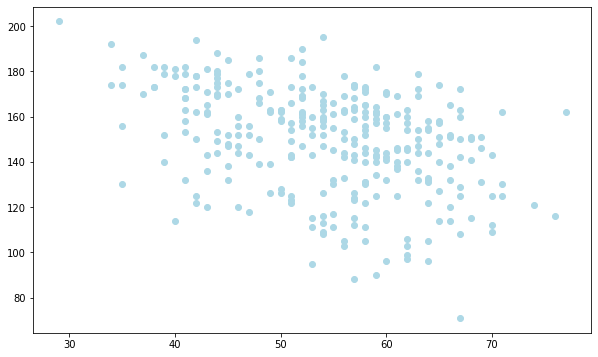

In [14]:
# Plotting general heart rate vs age of patients
plt.figure(figsize=(10, 6))

plt.scatter(df['age'],
            df['thalach'],
            color='lightblue');

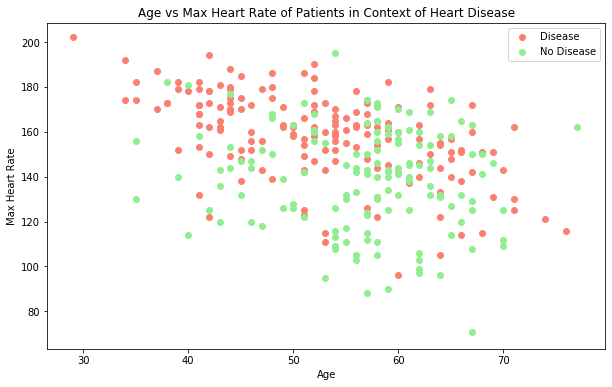

In [15]:
# Plotting max heart rate vs age for patients with and without heart disease
plt.figure(figsize=(10, 6))

plt.scatter(df['age'][df['target'] == 1],
            df['thalach'][df['target'] == 1],
            color='salmon');

plt.scatter(df['age'][df['target']==0],
            df['thalach'][df['target']==0],
            color='lightgreen');

plt.title('Age vs Max Heart Rate of Patients in Context of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

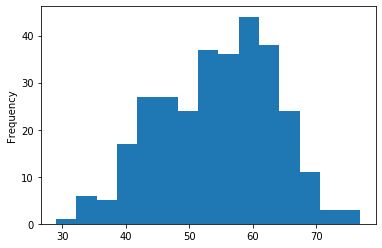

In [16]:
df['age'].plot.hist(bins=15);

### Heart Disease Frequency per Chest Pain Type

In [17]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


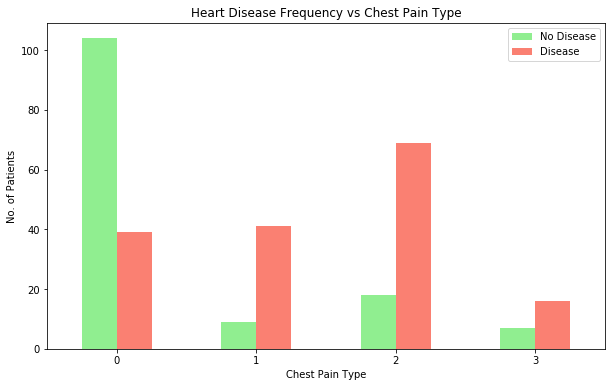

In [18]:
pd.crosstab(df['cp'], df['target']).plot.bar(figsize=(10, 6), color=['lightgreen', 'salmon'])

plt.title('Heart Disease Frequency vs Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Patients')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


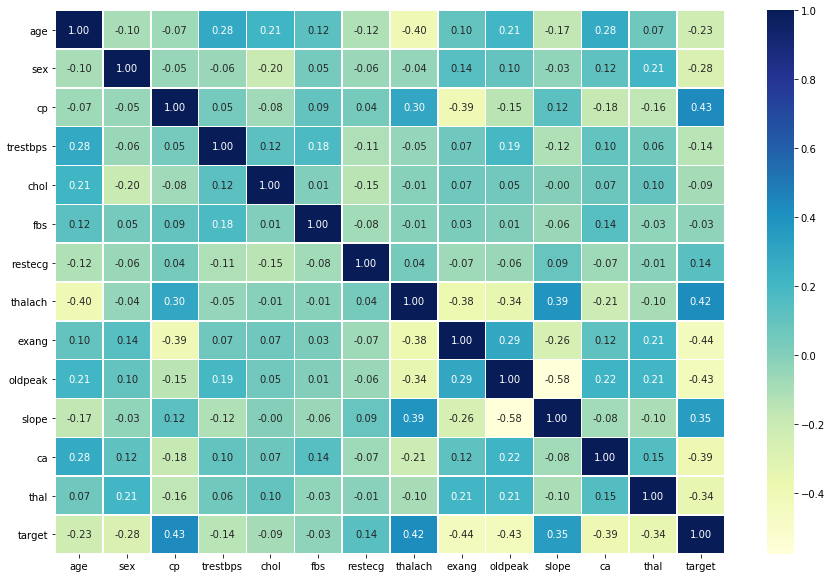

In [20]:
corr_matrix = df.corr()

fix, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

## 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split the data into X and y

X = df.drop('target', axis=1)
y = df['target']

In [23]:
# Split X and y into train and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
len(X)

303

Now that the data is ready, I'll try to make models by looking at [this map from sklearn documentation](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) and trying models which fit the criteria.

Models I'll try:
1. Logistic Regression (Because it's in tutorial)
2. Linear SVC
3. K-Nearest Neighbours Classifier
4. Random Forest Classifier

In [25]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'Linear SVC': LinearSVC(),
          'KNN Classifier': KNeighborsClassifier(),
          'Random Forest Classifier': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates different Scikit-Learn models.
    models : dict of different Scikit-Learn models
    X_train : training data (no labels)
    X_test : test data (no labels)
    y_train : training data (labels)
    y_test : test data (labels)
    '''
    
    # Random seed to reproduce results
    np.random.seed(42)
    
    # Dict to keep scores
    scores = {}
    
    # Looping through models
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Evaluate and store score
        scores[name] = model.score(X_test, y_test)
        
    return scores

In [26]:
# Fitting and evaluating models
scores = fit_and_evaluate(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)

scores

{'Logistic Regression': 0.8852459016393442,
 'Linear SVC': 0.8688524590163934,
 'KNN Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

**Note:** Linear SVC did good (it wasn't included in the tutorial)

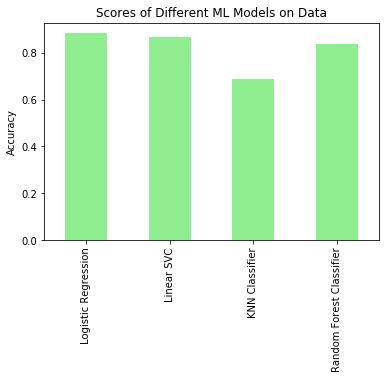

In [27]:
# Plotting the scores to compare
model_compare = pd.DataFrame(scores, index=['Accuracy'])
model_compare.T.plot.bar(color=['lightgreen'], legend=None)
plt.title('Scores of Different ML Models on Data')
plt.ylabel('Accuracy');

Initial predictions of a model aren't really something we can judge it's performance by, but KNN Classifier performs quite worse than the other 3, so we should drop it (but let's just work with it anyways :P).

Things to do next:
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision Score
* Recall Score
* F1 Score
* Classification Report
* ROC
* AUC

In [28]:
# Tuning KNN first because it performed worst
train_scores = []
test_scores = []

# Setting neighbours parameter range
neighbors = range(1, 21)

# Instantiating the model
knn = KNeighborsClassifier()

# Looping through the range of neighbours

for i in range(len(neighbors)):
    # Setting the parameter
    knn.set_params(n_neighbors=neighbors[i])
    
    # Fitting the model
    knn.fit(X_train, y_train)
    
    # Scoring the model on training and test set
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max Accuracy on Test Set: 75.41%


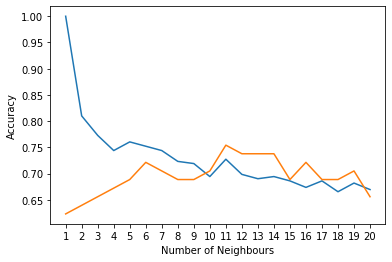

In [31]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy');

print(f'Max Accuracy on Test Set: {max(test_scores)*100:.2f}%')

KNN Classifier doesn't seem to improve much, discarding it

### Hyperparameter Tuning using RandomizedSearchCV

In [32]:
# Create a hyperparameter grid for LogisticRgression
logistic_regression_grid = {'C': np.logspace(-4, 4, 20),
                            'solver': ['liblinear']}

# Create a hyperparameter grid for LinearSVC
linear_svc_grid = {'loss': ['hinge', 'squared_hinge'],
                   'class_weight': [None, 'balanced'],
                   'max_iter': np.arange(100, 10000, 100)}

# Create a hyperparameter grid for RandomForestClassifier
rf_classifier_grid = {'n_estimators': np.arange(10, 1000, 50),
                      'max_depth': [None, 3, 5, 10],
                      'min_samples_split': np.arange(2, 20, 2),
                      'min_samples_leaf': np.arange(1, 20, 2)}

In [33]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_logistic_regression = RandomizedSearchCV(LogisticRegression(), 
                                            param_distributions=logistic_regression_grid,
                                            cv=5,
                                            n_iter=20,
                                            verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_logistic_regression.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [34]:
rs_logistic_regression.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_logistic_regression.score(X_test, y_test)

0.8852459016393442

In [36]:
# Tune LinearSVC

np.random.seed(42)

# Setup random hyperparameter search for LinearSVC
rs_linear_svc = RandomizedSearchCV(LinearSVC(),
                                   param_distributions=linear_svc_grid,
                                   cv=5,
                                   n_iter=20,
                                   verbose=True)

# Fit random hyperparameter search model for LinearSVC
rs_linear_svc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'loss': ['hinge', 's...
       4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500,
       5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600,
       6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700,
       7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800,
       8900, 9000, 9100, 9200, 9300, 940

In [37]:
rs_linear_svc.best_params_

{'max_iter': 5300, 'loss': 'hinge', 'class_weight': 'balanced'}

In [38]:
rs_linear_svc.score(X_test, y_test)

0.7704918032786885

In [39]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf_classifier = RandomizedSearchCV(RandomForestClassifier(),
                                      param_distributions=rf_classifier_grid,
                                      cv=5,
                                      n_iter=20,
                                      verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [40]:
rs_rf_classifier.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
rs_rf_classifier.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning using GridSearchCV

Since LogisticRegression model provided the best accuracy in a random search for hyperparameters, we'll continue with that and drop RandomForestClassifier.

For the sake of curiousity let's also continue to find best parameters for LinearSVC as it performed worse with randomized hyperparameters.

In [42]:
# Different grid for LogisticRegression and LinearSVC
logistic_regression_grid = {'C': np.logspace(-4, 4, 30),
                            'solver': ['liblinear']}

# Will use the same grid for LinearSVC

In [43]:
# Setup grid hyperparameter search for LogisticRegression
gs_logistic_regression = GridSearchCV(LogisticRegression(),
                                      param_grid=logistic_regression_grid,
                                      cv=5,
                                      verbose=True)

# Fit grid hyperparameter search model for LogisticRegession
gs_logistic_regression.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [44]:
gs_logistic_regression.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
gs_logistic_regression.score(X_test, y_test)

0.8852459016393442

In [46]:
# Setup grid hyperparameter search for LinearSVC
gs_linear_svc = GridSearchCV(LinearSVC(),
                             param_grid=linear_svc_grid,
                             cv=5,
                             verbose=True)

# Fit grid search model for LinearSVC
gs_linear_svc.fit(X_train, y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter'...
       4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500,
       5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600,
       6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700,
       7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800,
       8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900])},
             pre_dispatch='2*n_jobs

In [47]:
gs_linear_svc.best_params_

{'class_weight': 'balanced', 'loss': 'squared_hinge', 'max_iter': 8900}

In [48]:
gs_linear_svc.score(X_test, y_test)

0.5573770491803278

**Note:** This is weird, LinearSVC performed much much worse than it did originally, even when we included the default parameters in GridSearchCV. Will, look into it soon enough. For now, dropping LinearSVC.

### Evaluating our tuned ML model beyond accuracy

We'll use:
* ROC and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

and we'll use cross validation where possible

In [49]:
# Make predictions with trained model
y_preds = gs_logistic_regression.predict(X_test)

In [50]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

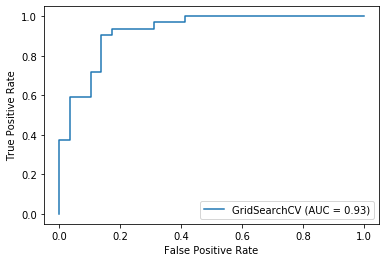

In [52]:
# Plot ROC and calculate AUC metric
plot_roc_curve(gs_logistic_regression, X_test, y_test);

In [53]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


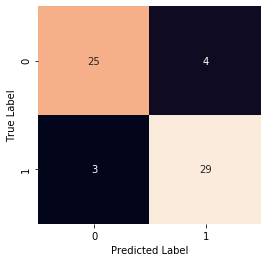

In [54]:
def plot_confusion_matrix(y_test, y_preds):
    '''
    Plots a confusion matrix using Seaborn's heatmap
    '''
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
plot_confusion_matrix(y_test, y_preds)

Now, let's find the cross validated score of precision, recall and f1

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation Metrics using Cross Validation

To do this we'll use `cross_val_score`

In [56]:
# Check best hyperparameters
gs_logistic_regression.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
# Create a new classifier with best hyperparameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [58]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='accuracy')

cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [59]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [60]:
# Cross-validated recall
# Cross-validated precision
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [61]:
# Cross-validated f1-score
# Cross-validated precision
cv_f1 = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

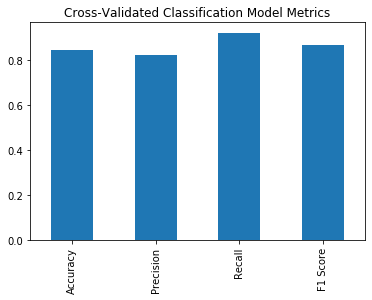

In [62]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1 Score': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Model Metrics',
                      legend=False);

### Feature Importance

Feature importance is finding out which features contributed the most to the output of the model and how did they contribute.

Finding feature importance is different for every model.

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [67]:
# Match 'coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_)[0]))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

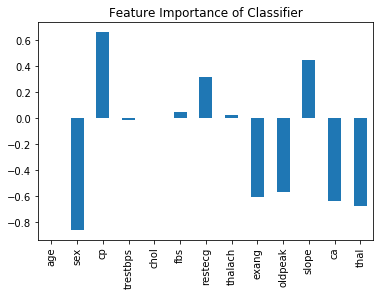

In [68]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance of Classifier',
                      legend=False);

In [69]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

We haven't hit the benchmark of 95% accuracy yet, so:
* Could we collect more data?
* Could we find a better model? Like CatBoost, XGBoost?
* Could we improve our current model further?


#### Starting My Own Research from Here